In [2]:
import pandas as pd
import requests
import json

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
tqdm.pandas()

import os

import scite_dev

/home/asura/Projects/scholcommlab/content-based-citations/.venv/lib/python3.8/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

sns.set(
    font_scale=1.5,
    rc={
        "font.family": "sans-serif",
        "font.size": 16.0,
        "figure.figsize": (11.69, 8.27),
    }
)

In [82]:
ref_counts = refs.groupby("target").source.value_counts().to_frame("count")
ref_counts = ref_counts.reset_index()

# avg refs per source
articles['avg_refs_per_source'] = ref_counts.groupby("target").apply(lambda x: x['count'].sum()/x['source'].nunique())

In [97]:
sources = set(refs.source.unique())
targets = set(refs.target.unique())
complete_articles = sources.intersection(targets)

In [98]:
refs[(refs.source.isin(complete_articles)) & (refs.target.isin(complete_articles))]

,id,negative,neutral,positive,refLocation,section,snippet,source,target,type,typeConfidence,expertClassification
5,1456245643,0.002156,1.000000,0.006942,cr8/1,,"Izrael and collaborators [<cite data-doi=""10.1...",10.1186/s13287-018-1006-y,10.1186/s13287-018-0890-5,mentioning,1.000000,NaN
9,1396526038,0.014492,1.000000,0.018137,b18/1,The Mitochondrial Permeability Transition Pore...,Aβ-induced neurotoxicity in vitro was also att...,10.3389/fnins.2018.00470,10.1038/cddis.2017.489,mentioning,1.000000,NaN
2,1389180240,0.020341,1.000000,0.045926,bib38/1,Discussion,Since we have shown that these motoneurons can...,10.7554/elife.30955,10.1113/jp274170,mentioning,1.000000,NaN
62,1973380534,0.027743,1.000000,0.029484,b111/1,Necroinflammation as a contributor to neuroinf...,It has been well established that Aβ plaque-as...,10.1038/s41418-018-0195-3,10.1186/s13024-018-0254-8,mentioning,1.000000,NaN
38,2039662198,0.032703,1.000000,0.016409,b171/1,Mouse models,As these animals age and the disease progresse...,10.1074/jbc.r118.003237,10.1007/s00401-017-1711-0,mentioning,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2,1383319937,0.000341,1.000000,0.000566,r36/1,Leveraging structure-based drug designing to d...,Authors further discuss different neurological...,10.2174/1570159x1508171114113425,10.2174/1570159x15666170102145257,mentioning,1.000000,NaN
1,1389237288,0.000677,1.000000,0.001371,b6-toxins-10-00083/1,1. Introduction,"BMAA, when conjugated with bicarbonate ions HC...",10.3390/toxins10020083,10.3390/toxins10010006,mentioning,1.000000,NaN
77,1396507732,0.012720,1.000000,0.027890,b53/1,General pathology and mechanisms of axonal injury,"Together, these observations led to the hypoth...",10.3389/fnins.2018.00467,10.1016/j.neuron.2017.02.022,mentioning,1.000000,NaN
97,1589029357,0.013841,0.987915,0.090362,r65/1,1. Introduction,"However, others have recently shown that MAPK ...",10.1016/j.exer.2018.03.007,10.1016/j.neuron.2017.02.022,mentioning,0.987915,NaN


In [173]:
articles['avg_refs_per_source'].describe()

count    4457.000000
mean        1.622260
std         0.867389
min         1.000000
25%         1.125000
50%         1.426667
75%         1.777778
max        19.000000
Name: avg_refs_per_source, dtype: float64

In [187]:
refs[refs.target=="10.1038/s41396-017-0005-9"].source.nunique()

16

In [184]:
articles.

,references,scite_citations,source_nunique,wos_citations,avg_refs_per_source
10.1038/s41396-017-0005-9,31,16,16.0,NaN,1.937500
10.1097/md.0000000000010320,2,1,1.0,NaN,2.000000
10.3389/fneur.2017.00356,0,0,NaN,NaN,NaN
10.1194/jlr.m086991,1,1,1.0,NaN,1.000000
10.1113/jp272591,30,5,5.0,NaN,6.000000
...,...,...,...,...,...
10.1007/978-90-368-1615-1_1,0,0,NaN,NaN,NaN
10.1177/2054358117725294,2,1,1.0,NaN,2.000000
10.1177/1179069518795874,1,1,1.0,NaN,1.000000
10.1177/0269216318784474,15,9,9.0,NaN,1.666667


In [191]:
articles[articles.scite_citations>=50]

,references,scite_citations,source_nunique,wos_citations,avg_refs_per_source
10.1016/j.molcel.2016.02.034,143,51,51.0,NaN,2.803922
10.1155/2017/8416763,155,109,109.0,NaN,1.422018
10.1038/nn.4361,336,178,178.0,NaN,1.887640
10.1038/nri.2016.62,196,130,130.0,NaN,1.507692
10.1056/nejmoa1608085,112,67,67.0,NaN,1.671642
...,...,...,...,...,...
10.1093/nar/gkw865,94,60,60.0,NaN,1.566667
10.1126/scitranslmed.aag0481,91,56,56.0,NaN,1.625000
10.15252/embj.201695957,175,76,77.0,NaN,2.272727
10.2147/clep.s91125,981,568,570.0,NaN,1.721053


In [200]:
articles[articles.scite_citations==1].describe()

,references,scite_citations,source_nunique,wos_citations,avg_refs_per_source
count,483.000000,483.0,483.000000,0.0,483.000000
mean,1.590062,1.0,1.004141,NaN,1.585921
std,1.528995,0.0,0.064282,NaN,1.529234
min,1.000000,1.0,1.000000,NaN,1.000000
25%,1.000000,1.0,1.000000,NaN,1.000000
50%,1.000000,1.0,1.000000,NaN,1.000000
75%,2.000000,1.0,1.000000,NaN,2.000000
max,19.000000,1.0,2.000000,NaN,19.000000


In [195]:
articles[articles.scite_citations==2].corr(method="spearman")

,references,scite_citations,source_nunique,wos_citations,avg_refs_per_source
references,1.000000,NaN,0.106742,NaN,0.991272
scite_citations,NaN,NaN,NaN,NaN,NaN
source_nunique,0.106742,NaN,1.000000,NaN,-0.015896
wos_citations,NaN,NaN,NaN,NaN,NaN
avg_refs_per_source,0.991272,NaN,-0.015896,NaN,1.000000


# Questions for Josh

- Difference between TotalCitations and sum of `citations['source']`
- Different methods of capturing citations in PDFs (versus PMC with JATS dumps)

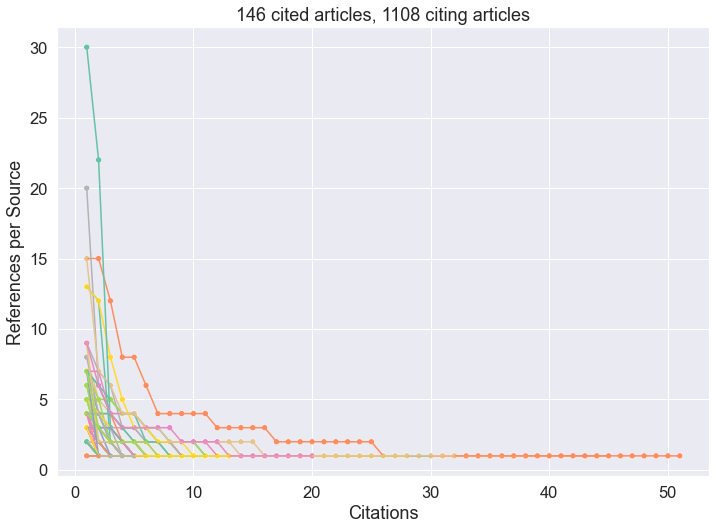

In [321]:
df = refs.head(2000)
df = df.groupby("target")['source'].value_counts(ascending=False).to_frame("refs_per_source").reset_index()
ranks = df.groupby("target").apply(lambda x: x['refs_per_source'].rank(ascending=False, method="first")).to_frame("rank")
df['rank'] = ranks.reset_index()['rank']

max_cites=df.groupby("target").apply(lambda x: x.iloc[-1])
min_cites=df.groupby("target").apply(lambda x: x.iloc[0])

cp = sns.color_palette("Set2", df.target.nunique())

sns.lineplot(data=df, x="rank", y="refs_per_source", hue="target", legend=False, palette=cp)
sns.scatterplot(data=df, x="rank", y="refs_per_source", hue="target", legend=False, palette=cp)

plt.title(f"{df.target.nunique()} cited articles, {df.source.nunique()} citing articles")
plt.xlabel("Citations")
plt.ylabel("References per Source");

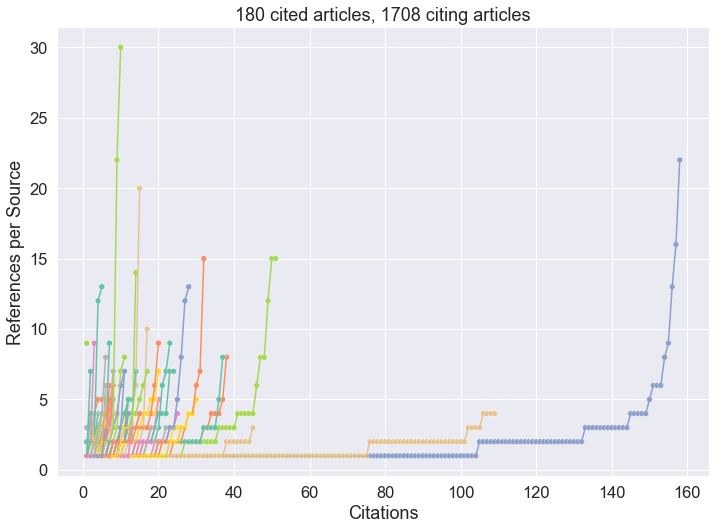

In [332]:
df = refs.head(3000)
df = df.groupby("target")['source'].value_counts().to_frame("refs_per_source").reset_index()
ranks = df.groupby("target").apply(lambda x: x['refs_per_source'].rank(method="first")).to_frame("rank")
df['rank'] = ranks.reset_index()['rank']

max_cites=df.groupby("target").apply(lambda x: x.iloc[-1])
min_cites=df.groupby("target").apply(lambda x: x.iloc[0])

cp = sns.color_palette("Set2", df.target.nunique())

sns.lineplot(data=df, x="rank", y="refs_per_source", hue="target", legend=False, palette=cp)
sns.scatterplot(data=df, x="rank", y="refs_per_source", hue="target", legend=False, palette=cp)

plt.title(f"{df.target.nunique()} cited articles, {df.source.nunique()} citing articles")
plt.xlabel("Citations")
plt.ylabel("References per Source");

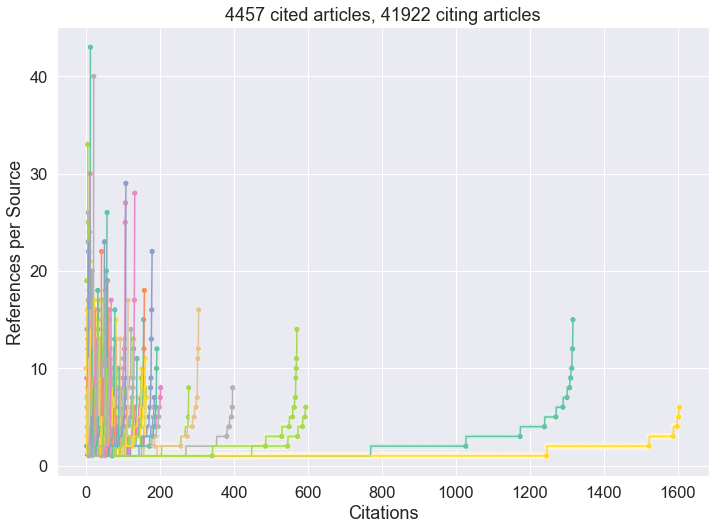

In [323]:
df = refs
df = df.groupby("target")['source'].value_counts().to_frame("refs_per_source").reset_index()
ranks = df.groupby("target").apply(lambda x: x['refs_per_source'].rank(method="first")).to_frame("rank")
df['rank'] = ranks.reset_index()['rank']

max_cites=df.groupby("target").apply(lambda x: x.iloc[-1])
min_cites=df.groupby("target").apply(lambda x: x.iloc[0])

cp = sns.color_palette("Set2", df.target.nunique())

sns.lineplot(data=df, x="rank", y="refs_per_source", hue="target", legend=False, palette=cp)
sns.scatterplot(data=df, x="rank", y="refs_per_source", hue="target", legend=False, palette=cp)

plt.title(f"{df.target.nunique()} cited articles, {df.source.nunique()} citing articles")
plt.xlabel("Citations")
plt.ylabel("References per Source");

In [330]:
articles.references.quantile(.95)

58.05000000000018

In [327]:
articles.scite_citations.quantile(.95)

37.0

<AxesSubplot:>

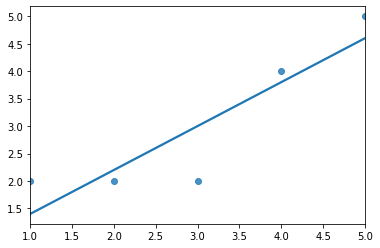

In [219]:
import numpy as np

a = [1,1,1,1,1]
b = [3,3,3,3,3]
c = [2,2,2,4,5]

sns.regplot(y=c,x=[1,2,3,4,5], ci=False)

In [226]:
c

[2, 2, 2, 4, 5]

In [229]:
x = [1,2,3,4,5]
y = c

model = np.polyfit(x, x, deg=1)

predict = np.poly1d(model)

In [232]:
model

array([1.00000000e+00, 2.34513178e-16])

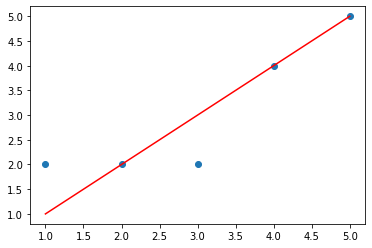

In [231]:
x_lin_reg = range(1, 6)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')